<a href="https://colab.research.google.com/github/SK-15/NLP_Projects/blob/master/Text_generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import string 

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
!wget --no-check-certificate \
    https://drive.google.com/uc?id=1LiJFZd41ofrWoBtW-pMYsfz1w8Ny0Bj8 \
    -O /tmp/songdata.csv

--2020-10-09 14:05:47--  https://drive.google.com/uc?id=1LiJFZd41ofrWoBtW-pMYsfz1w8Ny0Bj8
Resolving drive.google.com (drive.google.com)... 108.177.125.101, 108.177.125.138, 108.177.125.100, ...
Connecting to drive.google.com (drive.google.com)|108.177.125.101|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-04-ak-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/0osghqbh8i16t1btmip3lh7vvq4d5u7k/1602252300000/11118900490791463723/*/1LiJFZd41ofrWoBtW-pMYsfz1w8Ny0Bj8 [following]
--2020-10-09 14:05:51--  https://doc-04-ak-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/0osghqbh8i16t1btmip3lh7vvq4d5u7k/1602252300000/11118900490791463723/*/1LiJFZd41ofrWoBtW-pMYsfz1w8Ny0Bj8
Resolving doc-04-ak-docs.googleusercontent.com (doc-04-ak-docs.googleusercontent.com)... 64.233.189.132, 2404:6800:4008:c07::84
Connecting to doc-04-ak-docs.googleusercontent.com (doc-04-ak-docs.googleusercontent.com)|64

In [3]:
def tokenize_corpus(corpus, num_words=-1):
  # Fit a Tokenizer on the corpus
  if num_words > -1:
    tokenizer = Tokenizer(num_words=num_words)
  else:
    tokenizer = Tokenizer()
  tokenizer.fit_on_texts(corpus)
  return tokenizer

def create_lyrics_corpus(dataset, field):
  # Remove all other punctuation
  dataset[field] = dataset[field].str.replace('[{}]'.format(string.punctuation), '')
  # Make it lowercase
  dataset[field] = dataset[field].str.lower()
  # Make it one long string to split by line
  lyrics = dataset[field].str.cat()
  corpus = lyrics.split('\n')
  # Remove any trailing whitespace
  for l in range(len(corpus)):
    corpus[l] = corpus[l].rstrip()
  # Remove any empty lines
  corpus = [l for l in corpus if l != '']

  return corpus

In [4]:
# Read the dataset from csv - just first 10 songs for now
dataset = pd.read_csv('/tmp/songdata.csv', dtype=str)[:250]
# Create the corpus using the 'text' column containing lyrics
corpus = create_lyrics_corpus(dataset, 'text')
# Tokenize the corpus
tokenizer = tokenize_corpus(corpus)

total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)

{'the': 1, 'i': 2, 'you': 3, 'a': 4, 'and': 5, 'to': 6, 'me': 7, 'it': 8, 'in': 9, 'my': 10, 'of': 11, 'that': 12, 'your': 13, 'im': 14, 'for': 15, 'all': 16, 'on': 17, 'so': 18, 'love': 19, 'is': 20, 'be': 21, 'we': 22, 'youre': 23, 'when': 24, 'but': 25, 'like': 26, 'just': 27, 'dont': 28, 'its': 29, 'no': 30, 'know': 31, 'with': 32, 'now': 33, 'do': 34, 'la': 35, 'what': 36, 'got': 37, 'can': 38, 'have': 39, 'was': 40, 'take': 41, 'one': 42, 'down': 43, 'if': 44, 'get': 45, 'yeah': 46, 'never': 47, 'time': 48, 'she': 49, 'see': 50, 'up': 51, 'go': 52, 'out': 53, 'baby': 54, 'were': 55, 'more': 56, 'gonna': 57, 'oh': 58, 'this': 59, 'they': 60, 'want': 61, 'night': 62, 'he': 63, 'gotta': 64, 'make': 65, 'at': 66, 'from': 67, 'are': 68, 'let': 69, 'cant': 70, 'way': 71, 'will': 72, 'theres': 73, 'feel': 74, 'well': 75, 'think': 76, 'cause': 77, 'away': 78, 'as': 79, 'could': 80, 'girl': 81, 'aint': 82, 'day': 83, 'how': 84, 'tell': 85, 'her': 86, 'little': 87, 'life': 88, 'said': 89, 

In [5]:
sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		sequences.append(n_gram_sequence)

# Pad sequences for equal input length 
max_sequence_len = max([len(seq) for seq in sequences])
sequences = np.array(pad_sequences(sequences, maxlen=max_sequence_len, padding='pre'))

# Split sequences between the "input" sequence and "output" predicted word
input_sequences, labels = sequences[:,:-1], sequences[:,-1]
# One-hot encode the labels
one_hot_labels = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [6]:
# Check out how some of our data is being stored
# The Tokenizer has just a single index per word
print(tokenizer.word_index['know'])
print(tokenizer.word_index['feeling'])
# Input sequences will have multiple indexes
print(input_sequences[5])
print(input_sequences[6])
# And the one hot labels will be as long as the full spread of tokenized words
print(one_hot_labels[5])
print(one_hot_labels[6])

31
158
[  0   0   0   0   0   0   0   0   0   0   0   0   0 111  66  86 206  29
   4]
[   0    0    0    0    0    0    0    0    0    0    0    0  111   66
   86  206   29    4 1196]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional

model = Sequential()
model.add(Embedding(total_words, 64, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(20)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(input_sequences, one_hot_labels, epochs=100, verbose=1)

Epoch 1/100
1557/1557 [==============================] - 26s 17ms/step - loss: 6.3117 - accuracy: 0.0445
Epoch 2/100
1557/1557 [==============================] - 25s 16ms/step - loss: 5.9424 - accuracy: 0.0499
Epoch 3/100
1557/1557 [==============================] - 25s 16ms/step - loss: 5.7184 - accuracy: 0.0653
Epoch 4/100
1557/1557 [==============================] - 25s 16ms/step - loss: 5.5347 - accuracy: 0.0906
Epoch 5/100
1557/1557 [==============================] - 25s 16ms/step - loss: 5.3401 - accuracy: 0.1113
Epoch 6/100
1557/1557 [==============================] - 26s 16ms/step - loss: 5.1438 - accuracy: 0.1286
Epoch 7/100
1557/1557 [==============================] - 25s 16ms/step - loss: 4.9612 - accuracy: 0.1422
Epoch 8/100
1557/1557 [==============================] - 25s 16ms/step - loss: 4.7996 - accuracy: 0.1548
Epoch 9/100
1557/1557 [==============================] - 25s 16ms/step - loss: 4.6536 - accuracy: 0.1702
Epoch 10/100
1557/1557 [==============================]

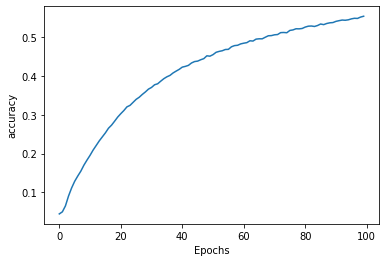

In [8]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

plot_graphs(history, 'accuracy')

In [9]:
seed_text = "im feeling chills"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = np.argmax(model.predict(token_list), axis=-1)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

im feeling chills the same old girl for me and me and a race is uncle sams mercy trough cost out sail hero night where of piece of violence spun songs pushed size coming tearing familiar be zone on unreal come hurry home get the dream bees change that been ha ha ha ha sounds hit again on my crown town was slow down song again screams deep fuss ticket yeah deep sun life on a little bit instinctively still shove high shame tighter or or have to me to blame what they am the teacher runs dry street cannot shout he voice
